In [1]:
!git clone https://github.com/fizyr/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 4712, done.
remote: Total 4712 (delta 0), reused 0 (delta 0), pack-reused 4712
Receiving objects: 100% (4712/4712), 14.44 MiB | 8.10 MiB/s, done.
Resolving deltas: 100% (3123/3123), done.


In [2]:
%cd keras-retinanet/

!pip install .

/Users/nehayawalkar/Pothole-detection/keras-retinanet
Processing /Users/nehayawalkar/Pothole-detection/keras-retinanet
  Running setup.py bdist_wheel for keras-retinanet ... done
  Stored in directory: /Users/nehayawalkar/Library/Caches/pip/wheels/00/3b/a6/631d25505df38834e01f986a9ee05267d637c401c2aacedafa
Successfully built keras-retinanet
  Found existing installation: keras-retinanet 0.5.0
    Uninstalling keras-retinanet-0.5.0:
      Successfully uninstalled keras-retinanet-0.5.0
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
!python setup.py build_ext --inplace

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.macosx-10.7-x86_64-3.7
creating build/temp.macosx-10.7-x86_64-3.7/keras_retinanet
creating build/temp.macosx-10.7-x86_64-3.7/keras_retinanet/utils
gcc -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -I/anaconda3/include -arch x86_64 -I/anaconda3/include -arch x86_64 -I/anaconda3/include/python3.7m -I/anaconda3/lib/python3.7/site-packages/numpy/core/include -c keras_retinanet/utils/compute_overlap.c -o build/temp.macosx-10.7-x86_64-3.7/keras_retinanet/utils/compute_overlap.o
In file included from keras_retinanet/utils/compute_overlap.c:567:
In file included from /anaconda3/lib/python3.7/site-packages/numpy/core/include/numpy/arrayobject.h:4:
In file included from /anaconda3/lib/python3.7/site-packages/numpy/core/include/numpy/nda

In [4]:
import os
import shutil
import zipfile
import urllib
import xml.etree.ElementTree as ET
import numpy as np
import csv
import pandas

In [5]:
DATASET_DIR = '/Users/nehayawalkar/Pothole-detection/dataset'
ANNOTATIONS_FILE = 'annotations.csv'
CLASSES_FILE = 'classes.csv'

In [6]:
annotations = []
classes = set([])

for xml_file in [f for f in os.listdir(DATASET_DIR) if f.endswith(".xml")]:
    tree = ET.parse(os.path.join(DATASET_DIR, xml_file))
    root = tree.getroot()

    file_name = None

    for elem in root:
        if elem.tag == 'filename':
            file_name = os.path.join(DATASET_DIR, elem.text)

        if elem.tag == 'object':
            obj_name = None
            coords = []
            for subelem in elem:
                if subelem.tag == 'name':
                    obj_name = subelem.text
                if subelem.tag == 'bndbox':
                    for subsubelem in subelem:
                        coords.append(subsubelem.text)
            item = [file_name] + coords + [obj_name]
            annotations.append(item)
            classes.add(obj_name)

with open(ANNOTATIONS_FILE, 'w') as f:
    writer = csv.writer(f)
    writer.writerows(annotations)

with open(CLASSES_FILE, 'w') as f:
    for i, line in enumerate(classes):
        f.write('{},{}\n'.format(line,i))

In [7]:
PRETRAINED_MODEL = './snapshots/_pretrained_model.h5'

#### OPTION 1: DOWNLOAD INITIAL PRETRAINED MODEL FROM FIZYR ####
URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.0/resnet50_coco_best_v2.1.0.h5'
urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)

#### OPTION 2: DOWNLOAD CUSTOM PRETRAINED MODEL FROM GOOGLE DRIVE. CHANGE DRIVE_MODEL VALUE. USE THIS TO CONTINUE PREVIOUS TRAINING EPOCHS ####
#drive.mount('/content/gdrive')
#DRIVE_MODEL = '/content/gdrive/My Drive/Colab Notebooks/objdet_tensorflow_colab/resnet50_csv_10.h5'
#shutil.copy(DRIVE_MODEL, PRETRAINED_MODEL)


print('Downloaded pretrained model to ' + PRETRAINED_MODEL)

Downloaded pretrained model to ./snapshots/_pretrained_model.h5


In [24]:
!keras_retinanet/bin/train.py --freeze-backbone --random-transform --weights {PRETRAINED_MODEL} --batch-size 8 --steps 400 --epochs 10 csv annotations.csv classes.csv

Using TensorFlow backend.
2019-04-22 20:08:04.402406: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
Creating model, this may take a second...
Instructions for updating:
Colocations handled automatically by placer.
/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer classification_submodel due to mismatch in shape ((3, 3, 256, 18) vs (720, 256, 3, 3)).
  weight_values[i].shape))
/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer classification_submodel due to mismatch in shape ((18,) vs (720,)).
  weight_values[i].shape))
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, N

res4c_branch2a_relu (Activation (None, None, None, 2 0           bn4c_branch2a[0][0]              
__________________________________________________________________________________________________
padding4c_branch2b (ZeroPadding (None, None, None, 2 0           res4c_branch2a_relu[0][0]        
__________________________________________________________________________________________________
res4c_branch2b (Conv2D)         (None, None, None, 2 589824      padding4c_branch2b[0][0]         
__________________________________________________________________________________________________
bn4c_branch2b (BatchNormalizati (None, None, None, 2 1024        res4c_branch2b[0][0]             
__________________________________________________________________________________________________
res4c_branch2b_relu (Activation (None, None, None, 2 0           bn4c_branch2b[0][0]              
__________________________________________________________________________________________________
res4c_bran

Epoch 1/10
400/400 [==============================] - 13195s 33s/step - loss: 2.7836 - regression_loss: 2.0233 - classification_loss: 0.7603

Epoch 00001: saving model to ./snapshots/resnet50_csv_01.h5
Epoch 2/10
400/400 [==============================] - 12876s 32s/step - loss: 2.3736 - regression_loss: 1.8409 - classification_loss: 0.5327

Epoch 00002: saving model to ./snapshots/resnet50_csv_02.h5
Epoch 3/10
400/400 [==============================] - 12826s 32s/step - loss: 2.2162 - regression_loss: 1.7372 - classification_loss: 0.4790

Epoch 00003: saving model to ./snapshots/resnet50_csv_03.h5
Epoch 4/10
400/400 [==============================] - 13051s 33s/step - loss: 2.1138 - regression_loss: 1.6661 - classification_loss: 0.4478

Epoch 00004: saving model to ./snapshots/resnet50_csv_04.h5
Epoch 5/10
400/400 [==============================] - 13245s 33s/step - loss: 2.0381 - regression_loss: 1.6102 - classification_loss: 0.4279

Epoch 00005: saving model to ./snapshots/resnet50_

In [66]:
THRES_SCORE = 0.5

In [67]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%reload_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)

# use this environment flag to change which GPU to use
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# set the modified tf session as backend in keras
keras.backend.tensorflow_backend.set_session(get_session())


In [68]:
model_path = os.path.join('snapshots', sorted(os.listdir('snapshots'), reverse=True)[0])
print(model_path)

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')
model = models.convert_model(model)

# load label to names mapping for visualization purposes
labels_to_names = pandas.read_csv(CLASSES_FILE,header=None).T.loc[0].to_dict()

snapshots/resnet50_csv_10.h5


In [69]:
def img_inference(img_path):
    image = read_image_bgr(img_infer)

    # copy to draw on
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    # preprocess image for network
    image = preprocess_image(image)
    image, scale = resize_image(image)

    # process image
    start = time.time()
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
    print("processing time: ", time.time() - start)

    # correct for image scale
    boxes /= scale

    # visualize detections
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
      # scores are sorted so we can break
        if score < THRES_SCORE:
              break

        color = label_color(label)

        b = box.astype(int)
        draw_box(draw, b, color=color)

        caption = "{} {:.3f}".format(labels_to_names[label], score)
        draw_caption(draw, b, caption)

    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(draw)
    plt.show()

Running inference on: /Users/nehayawalkar/pothole-detection/test/image1.jpg
processing time:  6.12103796005249


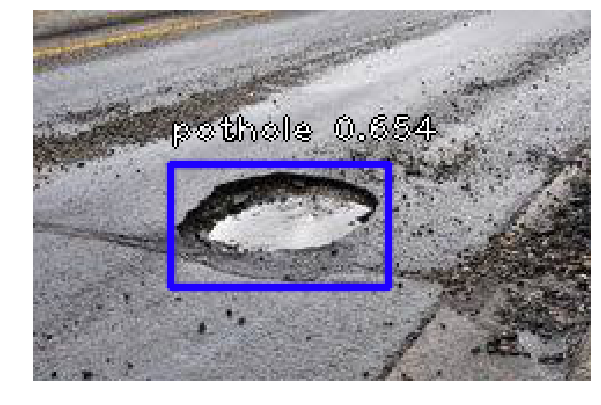

In [70]:
img_infer = '/Users/nehayawalkar/pothole-detection/test/image1.jpg'

print('Running inference on: ' + img_infer)
img_inference(img_infer)

Running inference on: /Users/nehayawalkar/pothole-detection/test/image3.jpg
processing time:  1.9442100524902344


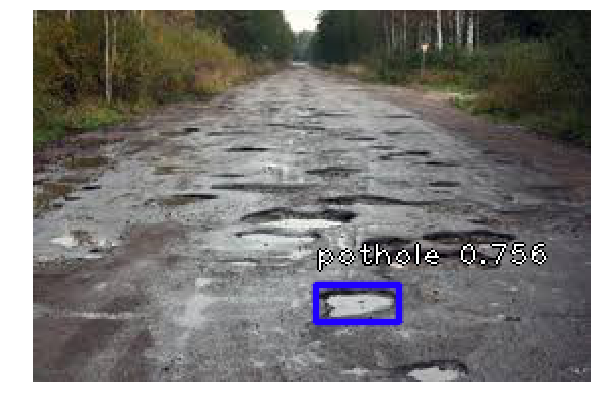

In [71]:
img_infer = '/Users/nehayawalkar/pothole-detection/test/image3.jpg'

print('Running inference on: ' + img_infer)
img_inference(img_infer)

Running inference on: /Users/nehayawalkar/pothole-detection/test/image27.jpg
processing time:  1.7324910163879395


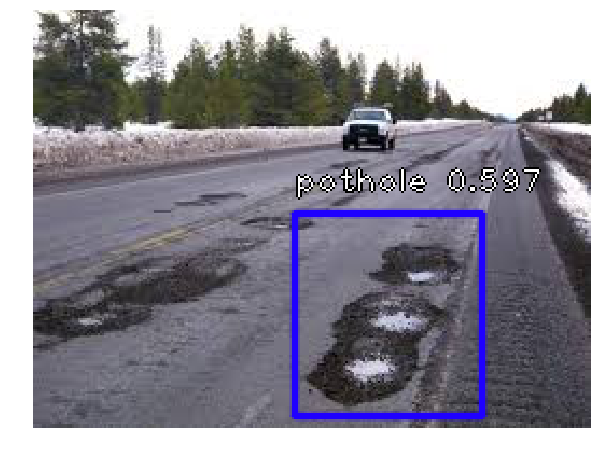

In [72]:
img_infer = '/Users/nehayawalkar/pothole-detection/test/image27.jpg'

print('Running inference on: ' + img_infer)
img_inference(img_infer)

Running inference on: /Users/nehayawalkar/pothole-detection/test/image15.jpg
processing time:  1.7538318634033203


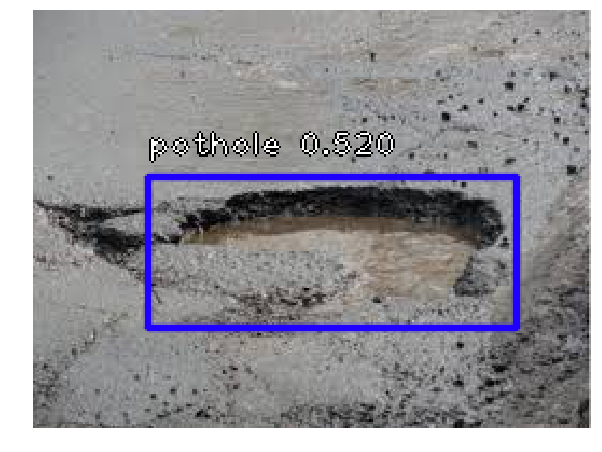

In [73]:
img_infer = '/Users/nehayawalkar/pothole-detection/test/image15.jpg'

print('Running inference on: ' + img_infer)
img_inference(img_infer)

Running inference on: /Users/nehayawalkar/pothole-detection/test/image34.jpg
processing time:  2.048161745071411


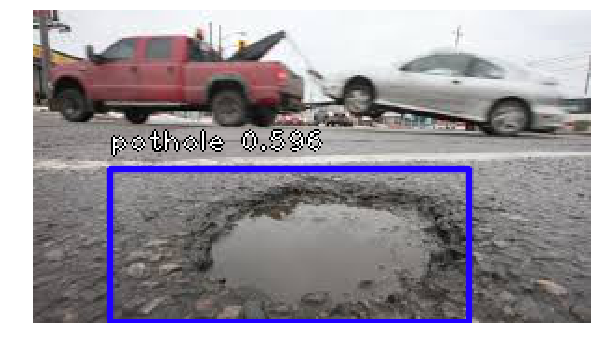

In [74]:
img_infer = '/Users/nehayawalkar/pothole-detection/test/image34.jpg'

print('Running inference on: ' + img_infer)
img_inference(img_infer)